In [ ]:
pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 KB 3.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df1 = pd.read_csv('/content/amazon.csv',header = None)
df2 = pd.read_csv('/content/imdb.csv',header = None)
df3 = pd.read_csv('/content/yelp.csv',header = None)

In [ ]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(1000, 2)
(1000, 2)
(1000, 2)


In [ ]:
df1[1].isna().sum()

0

In [ ]:
df2[1].isna().sum()

5

In [ ]:
df3[1].isna().sum()

0

In [ ]:
df2.dropna(axis=0, inplace=True)

In [ ]:
df2[1].isna().sum()

0

In [ ]:
df1.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [ ]:
df2.head()

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0.0
1,Not sure who was more lost - the flat characte...,0.0
2,Attempting artiness with black & white and cle...,0.0
3,Very little music or anything to speak of.,0.0
4,The best scene in the movie was when Gerardo i...,1.0


In [ ]:
dict(df2.dtypes)[1]

dtype('float64')

In [ ]:
df2[1]

0      0.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: 1, Length: 995, dtype: float64

In [ ]:
df2[1] = df2[1].astype(int)
df2.head()

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [ ]:
df3.head()

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df = pd.concat([df1, df2, df3])
df = pd.concat([df,df])

In [ ]:
df.shape  

(5990, 2)

In [ ]:
df.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [ ]:
df[1].value_counts()

0    3000
1    2990
Name: 1, dtype: int64

<Axes: xlabel='1', ylabel='count'>

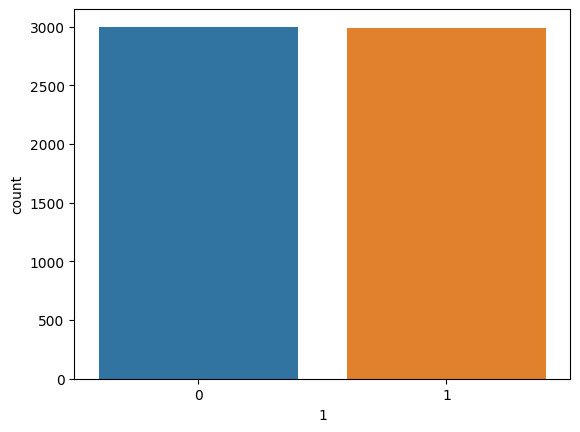

In [ ]:
sns.countplot(x=df[1])

In [ ]:
import neattext.functions as nfx

dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
data = pd.DataFrame()
data['review'] = df[0]
data['tag'] = df[1]
data.head()

,review,tag
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [ ]:
data['review'] = df[0].apply(nfx.remove_userhandles)
data['review'] = data['review'].apply(nfx.remove_punctuations)
data['review'] = data['review'].apply(nfx.remove_urls)
data['review'] = data['review'].apply(nfx.remove_multiple_spaces)
data['review'] = data['review'].apply(nfx.remove_currency_symbols)
data['review'] = data['review'].apply(nfx.remove_emojis)
data['review'] = data['review'].apply(nfx.remove_dates)
data['review'] = data['review'].apply(nfx.remove_phone_numbers)
data['review'] = data['review'].apply(nfx.remove_accents)
data['review'] = data['review'].apply(nfx.remove_hashtags)
data['review'] = data['review'].apply(nfx.remove_html_tags)
data['review'] = data['review'].apply(nfx.remove_non_ascii)
data['review'] = data['review'].apply(nfx.remove_puncts)
data['review'] = data['review'].apply(nfx.remove_special_characters)

In [ ]:
data.head()

,review,tag
0,So there is no way for me to plug it in here i...,0
1,Good case Excellent value,1
2,Great for the jawbone,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great,1


In [ ]:
data['review'] = data['review'].str.lower()
data.head()

,review,tag
0,so there is no way for me to plug it in here i...,0
1,good case excellent value,1
2,great for the jawbone,1
3,tied to charger for conversations lasting more...,0
4,the mic is great,1


In [ ]:
!pip install nlpaug

In [ ]:
import nlpaug.augmenter.word as naw

aug = naw.SynonymAug(aug_src='wordnet')
for i in range(len(data)):
    text = ' '.join(data.loc[i, 'review'])
    label = data.loc[i, 'tag']
    augmented_text = aug.augment(text)
    augmented_text = ' '.join(augmented_text) 
    data = data.append({'review': augmented_text.split(), 'tag': label}, ignore_index=True)


In [ ]:
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Tokenization
stop_words = set(stopwords.words('english'))
data['review'] = data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['review'])
X = tokenizer.texts_to_sequences(data['review'])
X = pad_sequences(X, padding='post', maxlen=100)


In [ ]:
from sklearn.preprocessing import LabelEncoder

reviews = data['review'].values
labels = data['tag'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [ ]:
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, stratify = encoded_labels)

In [ ]:
# Hyperparameters of the model
vocab_size = 3000 # choose based on statistics
oov_tok = ''
embedding_dim = 100
max_length = 200 # choose based on statistics, for example 150 to 200
padding_type='post'
trunc_type='post'
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [ ]:
from keras.preprocessing.text import Tokenizer
import keras
# LSTM
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 200, 100)          300000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dense_11 (Dense)            (None, 24)                3096      
                                                                 
 dense_12 (Dense)            (None, 1)                 25        
                                                                 
Total params: 387,601
Trainable params: 387,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=1, 
                    validation_split=0.1)

Epoch 1/10
127/127 [==============================] - 43s 293ms/step - loss: 0.6386 - accuracy: 0.6618 - val_loss: 0.4641 - val_accuracy: 0.8400
Epoch 2/10
127/127 [==============================] - 37s 288ms/step - loss: 0.2857 - accuracy: 0.8949 - val_loss: 0.2983 - val_accuracy: 0.8711
Epoch 3/10
127/127 [==============================] - 37s 295ms/step - loss: 0.1436 - accuracy: 0.9495 - val_loss: 0.2608 - val_accuracy: 0.9000
Epoch 4/10
127/127 [==============================] - 37s 290ms/step - loss: 0.0942 - accuracy: 0.9686 - val_loss: 0.2474 - val_accuracy: 0.9133
Epoch 5/10
127/127 [==============================] - 36s 285ms/step - loss: 0.0655 - accuracy: 0.9782 - val_loss: 0.2770 - val_accuracy: 0.9156
Epoch 6/10
127/127 [==============================] - 37s 287ms/step - loss: 0.0539 - accuracy: 0.9817 - val_loss: 0.2932 - val_accuracy: 0.9244
Epoch 7/10
127/127 [==============================] - 37s 292ms/step - loss: 0.0464 - accuracy: 0.9847 - val_loss: 0.2731 - val_ac

In [ ]:
from sklearn.metrics import accuracy_score

prediction = model.predict(test_padded)
# Get labels based on probability 1 if p>= 0.5 else 0
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred_labels))

47/47 [==============================] - 5s 100ms/step
Accuracy of prediction on test set :  0.9165554072096128
